In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("credit_risk.csv")
data

,Id,Age,Income,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,35000,16.02,1,0.59,Y,3
1,1,21,9600,1000,11.14,0,0.10,N,2
2,2,25,9600,5500,12.87,1,0.57,N,3
3,3,23,65500,35000,15.23,1,0.53,N,2
4,4,24,54400,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...
994,994,25,52526,18000,12.21,1,0.34,N,2
995,995,22,46610,18000,10.71,1,0.39,N,3
996,996,24,48000,18000,6.54,1,0.38,N,2
997,997,23,24000,8000,5.79,0,0.33,N,3


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Specify the columns that are categorical and need to be encoded
categorical_columns = ['Status', 'Default']

# Apply label encoding to the specified columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


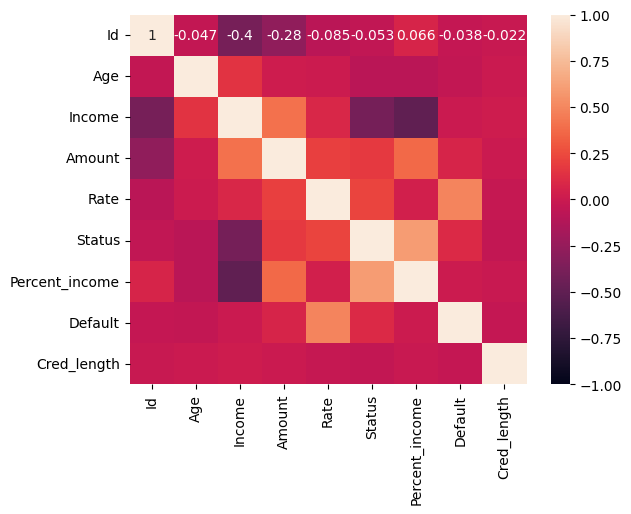

In [5]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'Percent_income'}>,
        <Axes: title={'center': 'Default'}>,
        <Axes: title={'center': 'Cred_length'}>]], dtype=object)

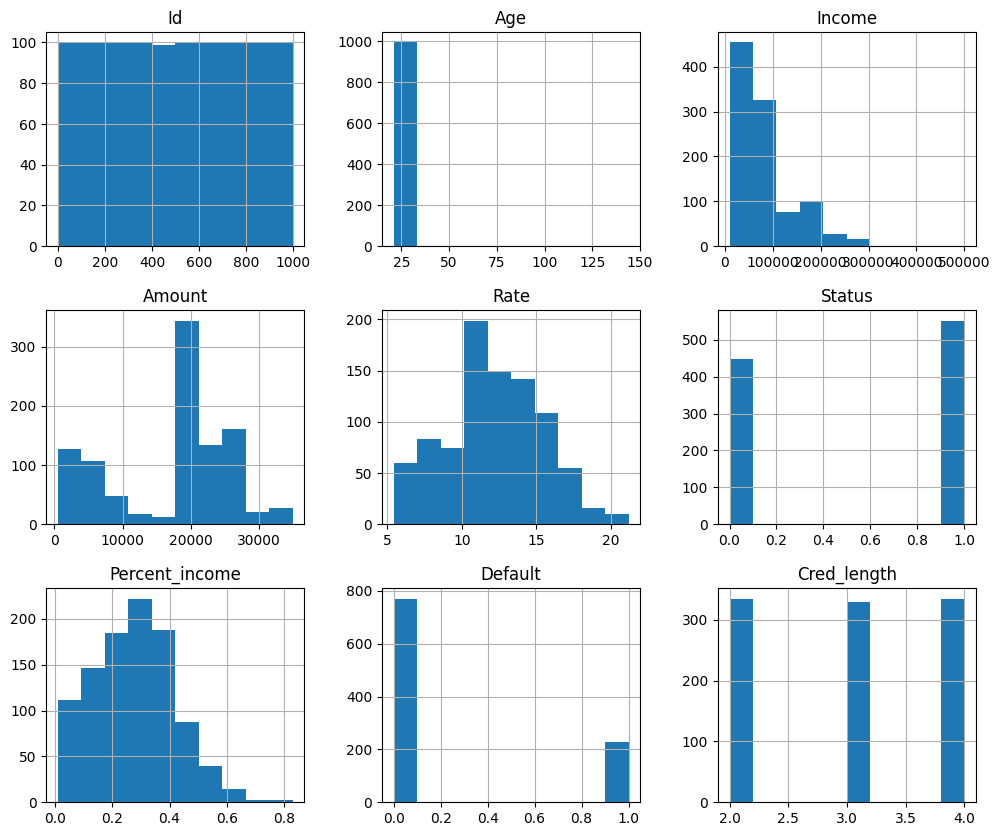

In [6]:
data.hist(figsize=(12,10))

C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

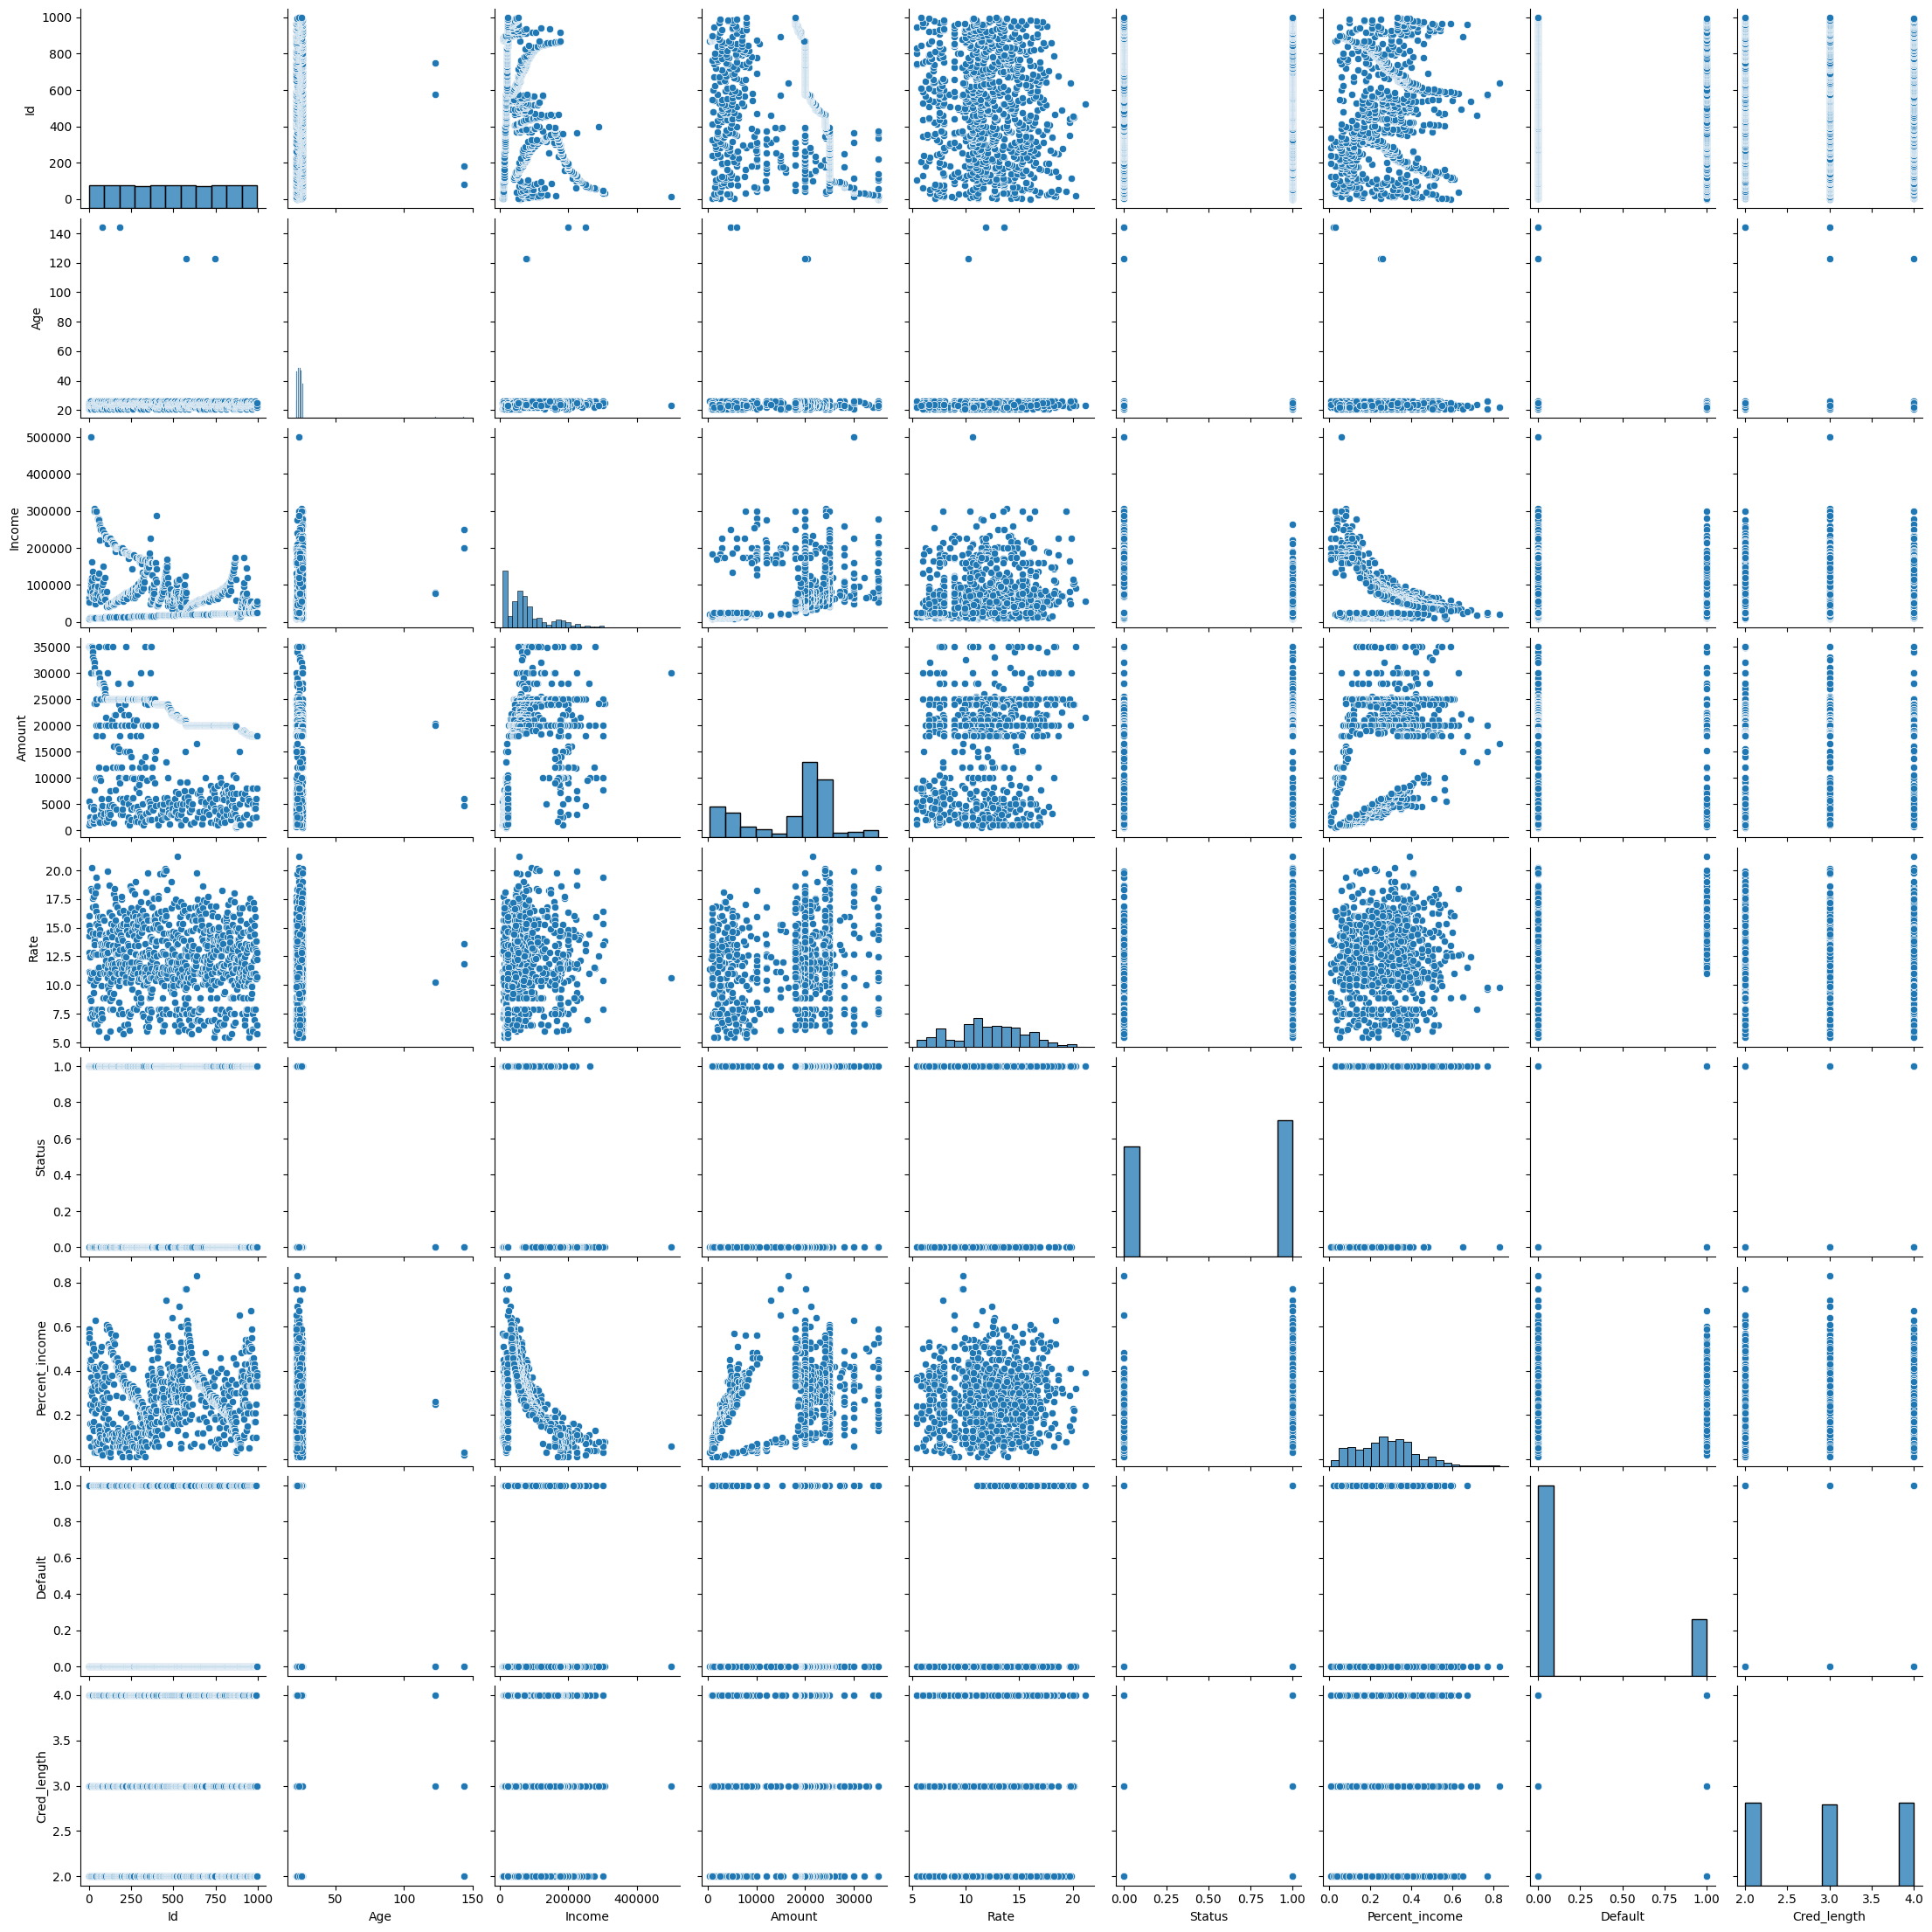

In [7]:
sns.pairplot(data)

In [8]:
data.isna().sum()

Id                  0
Age                 0
Income              0
Amount              0
Rate              102
Status              0
Percent_income      0
Default             0
Cred_length         0
dtype: int64

In [9]:
data=data.fillna(method='bfill')
data.isna().sum()

C:\Users\pater\AppData\Local\Temp\ipykernel_16468\798160749.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


Id                0
Age               0
Income            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [10]:
x = data.drop(columns=['Default'])
y = data['Default']

print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (999, 8)

Y shape:	 (999,)


In [11]:
x.head(2)

,Id,Age,Income,Amount,Rate,Status,Percent_income,Cred_length
0,0,22,59000,35000,16.02,1,0.59,3
1,1,21,9600,1000,11.14,0,0.10,2


In [12]:
y.head(2)

0    1
1    0
Name: Default, dtype: int32

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (899, 8)

Training data-y- Shape:	 (899,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (100, 8)

Testing data(y-Outcome) Shape:	 (100,)


In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (assuming it's in a DataFrame)
# X should contain features, and y should contain the target (credit risk)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear SVM classifier
linear_svm_classifier = svm.SVC(kernel='linear')

# Train the linear SVM model
linear_svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_svm_classifier.predict(X_test)

# Evaluate the linear SVM model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 0.74
Precision: 0.40
Recall: 0.04
F1-Score: 0.07


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'X' contains your feature data and 'y' contains the target labels (good or bad credit)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a non-linear SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rbf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200



C:\Users\pater\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pater\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pater\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [17]:
from sklearn import svm

# Create and train a linear SVM model
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x, y)

# Access the support vectors for the linear model
linear_support_vectors = linear_svm.support_vectors_

# Create and train a non-linear SVM model with an RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(x, y)

# Access the support vectors for the non-linear model
rbf_support_vectors = rbf_svm.support_vectors_

In [18]:
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [  46.71081098  414.74136479 1323.88726647  694.71854337  141.71159967
  164.69729121  270.92321189  653.10749848  195.9550453   390.83781846
 2870.04588063   67.03299745  452.66881497  741.58394654 1467.09035047
 -165.72085993  367.28352626  322.93584474  125.2033089   115.28715117
 2711.44218572 3367.65490468  313.40114625  167.26256164 2711.87027104
  156.50472243 1424.75541909  273.39646276 3118.75085385  270.48450168
  238.75912126 2257.84380849 -129.20056169  364.66668065 1606.50130399
 -123.61199395 1609.90434201  -33.83509366 -106.98628346  -61.21940939
  428.90250476  536.50220998  837.08237775  163.44343551  -76.92684237
   64.19495745  -83.89198129   21.55562897  772.63450177  523.52160676
 7262.26595815  559.32881959  678.04159482 1957.81636174  -92.48194568
  139.

In [19]:
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [0.09983118 0.09986514 0.10042099 0.10016185 0.09997649 0.0998114
 0.09979636 0.10007253 0.1003023  0.09991752 0.10017376 0.09981271
 0.09989719 0.10013001 0.1000199  0.10030821 0.09980938 0.099773
 0.09978048 0.09983147 0.09982601 0.09955228 0.09993315 0.10027914
 0.09972352 0.09980215 0.10052367 0.09978916 0.10001968 0.09977383
 0.09977771 0.09986276 0.10019416 0.09977482 0.09987616 0.09992125
 0.09960706 0.10026138 0.10002794 0.10027721 0.0997777  0.09991866
 0.10030596 0.0997757  0.10002473 0.10023135 0.10008016 0.10017039
 0.10012942 0.09984542 0.09801385 0.09994256 0.10027715 0.09981862
 0.10029254 0.09986779 0.1001285  0.0999711  0.10018146 0.09985002
 0.09989004 0.10010952 0.10006707 0.10016099 0.09995693 0.09973583
 0.09995133 0.09977056 0.10021342 0.10036381 0.09999718 

In [20]:
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [  7.74892255   6.462521   -26.46310135  -7.99548487  14.48554673
  14.76141369  14.44615308  -4.34725435   2.97108476   1.81227729
 -74.947212    15.34762339   3.96487334  -3.70161045 -45.53013683
  -5.6316232    9.26768304  12.65837575  11.74753096  10.87548531
 -64.50488904 -82.97188136   1.16322877   1.6122814  -67.09979864
  14.61994427 -27.20791433   8.58351851 -78.99347585  13.1427819
  13.74781325 -63.41148707 -12.2320969   13.07573703 -50.72698919
  12.77783955 -57.39387762  -6.69495118  12.44175268  -1.64646377
  11.63533533   5.25930028 -11.24192926  11.10945678  12.81910547
  -6.9538457   11.40467469 -15.81161989  -3.70167537   8.06583358
 -76.36380544   3.31256495 -12.8460428  -57.64459944  -1.9151199
  15.80810822   9.6467385    1.28829913 -12.63959382 -52.47127

# Support Vector Classification model

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [22]:
data=pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,35000,16.02,1,0.59,Y,3
1,1,21,9600,1000,11.14,0,0.10,N,2
2,2,25,9600,5500,12.87,1,0.57,N,3
3,3,23,65500,35000,15.23,1,0.53,N,2
4,4,24,54400,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...
994,994,25,52526,18000,12.21,1,0.34,N,2
995,995,22,46610,18000,10.71,1,0.39,N,3
996,996,24,48000,18000,6.54,1,0.38,N,2
997,997,23,24000,8000,5.79,0,0.33,N,3


In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [24]:
y_pred = svm_classifier.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        85
           1       1.00      0.07      0.12        15

    accuracy                           0.86       100
   macro avg       0.93      0.53      0.52       100
weighted avg       0.88      0.86      0.80       100



In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(xtrain, ytrain)
y_pred = svm_classifier.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [26]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        85
           1       0.12      0.13      0.13        15

    accuracy                           0.73       100
   macro avg       0.49      0.48      0.48       100
weighted avg       0.74      0.73      0.73       100



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [28]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


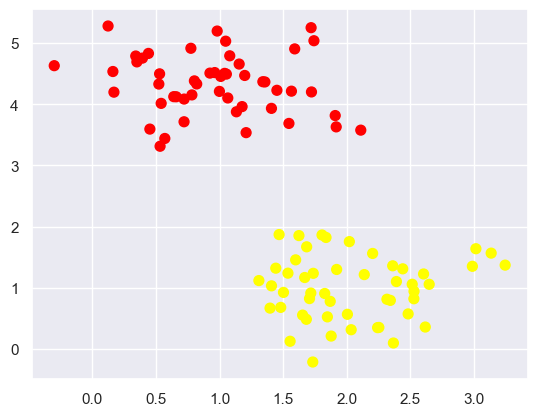

In [31]:

data.head()
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

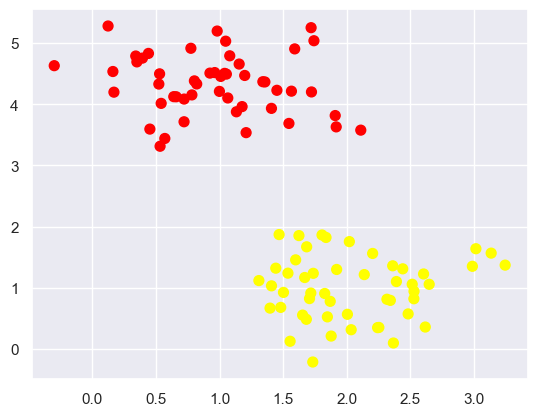

In [30]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

(-1.0, 4.0)

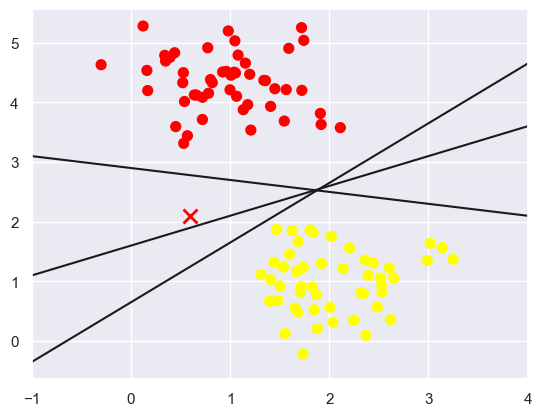

In [32]:
xfit=np.linspace(-1,4)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,4)

(-1.0, 3.5)

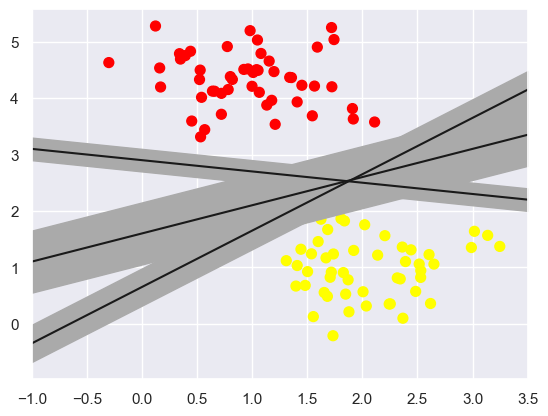

In [33]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)

In [34]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
 # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
 # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
 
 # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

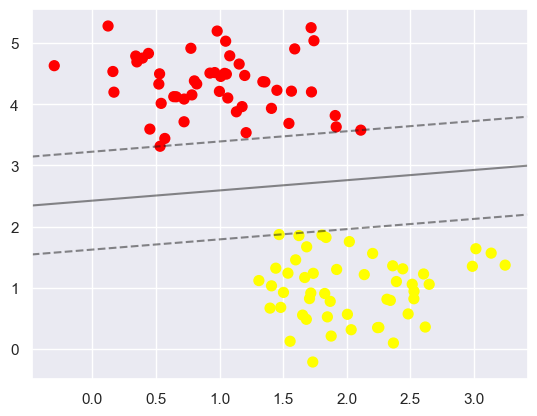

In [36]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [37]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

# Face Recognition with SVC

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [39]:
# Loads photos of people with a minimum number of 70 images
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

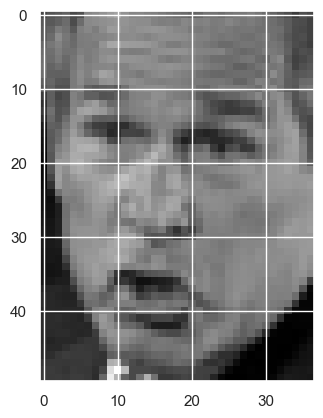

In [40]:
plt.imshow(lfw_people.images[6], cmap='gray')
plt.show()

In [41]:
lfw_people.images.shape

(1288, 50, 37)

In [42]:
n_samples, h, w, = lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1288
50
37


In [43]:
lfw_people.data.shape

(1288, 1850)

In [44]:
lfw_people.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [45]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [46]:
n_classes = lfw_people.target_names.shape[0]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target)

print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',x_train.shape)
print()
print('Training data-y- Shape:\t',y_train.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',x_test.shape)
print()
print('Testing data(y-Outcome) Shape:\t',y_test.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (966, 1850)

Training data-y- Shape:	 (966,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (322, 1850)

Testing data(y-Outcome) Shape:	 (322,)


In [51]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)
#train the model
from sklearn.model_selection import GridSearchCV # to get optimum parameter
param_grid={'svc__C':[1,5,10,20,50],
 'svc__gamma':[0.0001,0.0005,0.001,0.005]
 }
grid=GridSearchCV(pipe_model,param_grid)
%time grid.fit(x_train,y_train)
print(grid.best_params_)

CPU times: total: 3min 55s
Wall time: 2min 24s
{'svc__C': 5, 'svc__gamma': 0.005}


In [52]:
# import SVM method
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [53]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.80      0.78      0.79        60
           2       0.71      0.69      0.70        32
           3       0.87      0.83      0.85       131
           4       0.68      0.50      0.58        30
           5       0.71      0.83      0.77        18
           6       0.62      0.76      0.68        34

    accuracy                           0.77       322
   macro avg       0.72      0.75      0.73       322
weighted avg       0.78      0.77      0.77       322



In [54]:
model=grid.best_estimator_
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])


In [58]:
yfit=model.predict(x_test)
yfit

array([3, 3, 1, 3, 6, 4, 4, 3, 4, 3, 3, 6, 3, 0, 4, 3, 3, 3, 3, 6, 5, 3,
       1, 3, 1, 3, 0, 1, 3, 3, 6, 3, 3, 1, 1, 1, 5, 6, 3, 3, 1, 3, 1, 1,
       6, 3, 3, 6, 3, 1, 3, 3, 5, 3, 1, 3, 3, 3, 6, 3, 6, 3, 2, 1, 0, 6,
       2, 5, 3, 3, 3, 1, 3, 3, 0, 0, 6, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       1, 4, 3, 3, 3, 4, 3, 2, 3, 5, 2, 2, 3, 3, 6, 3, 3, 3, 3, 1, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 6, 3, 0, 4, 3, 3, 1, 3, 2, 1,
       6, 3, 3, 5, 2, 2, 3, 1, 3, 2, 6, 3, 3, 3, 6, 6, 0, 2, 3, 3, 0, 3,
       3, 3, 2, 1, 4, 1, 3, 3, 1, 3, 1, 3, 3, 2, 4, 3, 3, 3, 1, 6, 3, 1,
       4, 1, 0, 3, 3, 1, 3, 5, 3, 3, 3, 2, 5, 3, 3, 3, 1, 3, 0, 3, 0, 2,
       3, 1, 0, 3, 2, 0, 6, 1, 3, 1, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 5, 3, 3, 5, 3, 0, 3, 1, 1, 2, 3, 3, 3, 1, 4, 6, 3,
       3, 5, 3, 1, 1, 1, 3, 5, 3, 1, 3, 1, 5, 1, 3, 3, 3, 3, 3, 2, 1, 3,
       3, 3, 3, 3, 4, 2, 2, 1, 3, 4, 5, 3, 3, 6, 6, 2, 1, 1, 6, 4, 2, 3,
       3, 6, 3, 3, 1, 6, 3, 1, 3, 2, 1, 1, 3, 3, 0,

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

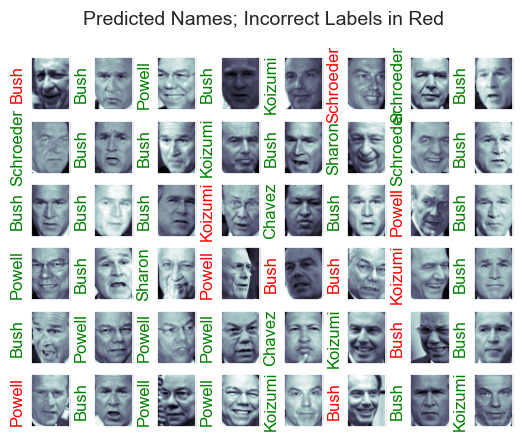

In [71]:
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)

fig, ax = plt.subplots(6, 8)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(h, w), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='green' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

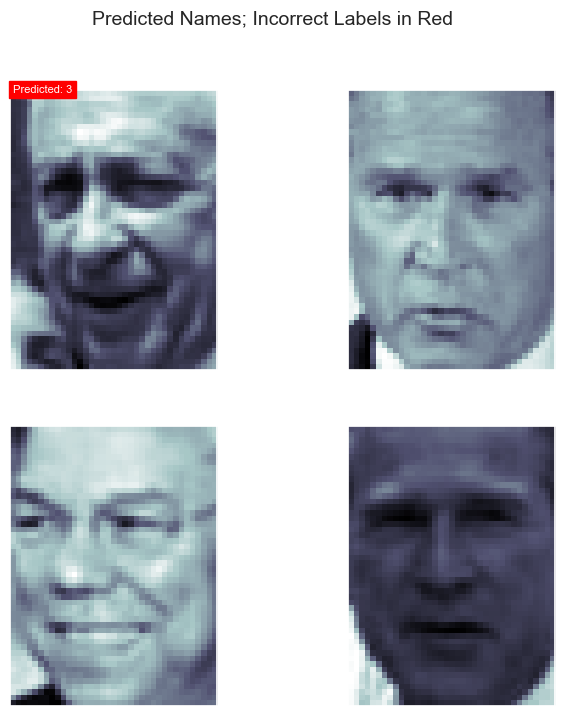

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns for subplots
n_rows, n_cols = 2, 2

# Set the desired size of the entire figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 8))  # Adjust the size as needed

# Rest of your code remains the same
for i, axi in enumerate(ax.flat):
    image = x_test[i].reshape(50, 37)
    axi.imshow(image, cmap='bone')
    axi.set(xticks=[], yticks=[])

    if yfit[i] != y_test[i]:
        axi.text(0, 0, 'Predicted: ' + str(yfit[i]), backgroundcolor='red', color='white', fontsize=8)

# Set the title for the entire figure
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

plt.show()


In [73]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('='*80)
print('Accuracy Score:\n',accuracy_score(y_test,yfit))
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(y_test,yfit))
print('-'*80)
print('Classification Report:\n',classification_report(y_test,yfit))
print('='*80)

Accuracy Score:
 0.8229813664596274
Confusion Matrix:
 [[ 15   0   0   2   0   0   0]
 [  1  45   2  10   0   1   1]
 [  0   2  24   5   0   0   1]
 [  0   5   2 124   0   0   0]
 [  0   1   2   6  17   1   3]
 [  0   1   0   4   0  13   0]
 [  0   0   0   6   1   0  27]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.83      0.75      0.79        60
           2       0.80      0.75      0.77        32
           3       0.79      0.95      0.86       131
           4       0.94      0.57      0.71        30
           5       0.87      0.72      0.79        18
           6       0.84      0.79      0.82        34

    accuracy                           0.82       322
   macro avg       0.86      0.77      0.81       322
weighted avg       0.83      0.82      0.82       322

